# View data instance

In [101]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

def load_json(path):
    with open(path,'r') as f:
        data = json.load(f)
    return data


def save_json(data, path):
    with open(path, 'w') as f:
        json.dump(data, f)


def show_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def show_image_from_path(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def print_dialog_with_img_from_path(dp):
    dialog = dp['dialogue']
    image_paths = [img['image_path'] for img in dp['images']]
    # img_idx = 0
    for turn in dialog:
        print(f'User {turn['speaker_id']}: {turn['utterance']}')
        if turn['shared_images'] is not None:
            show_image_from_path(image_paths[turn['shared_images']])
            # img_idx += 1

def print_dialog_with_img_from_url(dp):
    dialog = dp['dialogue']
    image_urls = [img['image_url'] for img in dp['images']]
    img_idx = 0
    for turn in dialog:
        print(f'User {turn["speaker_id"]}: {turn["utterance"]}')
        if turn['shared_images'] is not None:
            show_image_from_url(image_urls[turn['shared_images']])
            # img_idx += 1



data_path = 'MDSEval_data.json'
data = load_json(data_path)

User 1: Hey, nothing much going on here. What did you do today?
User 0: Oh just hanging out. Its so hot out I just wanna stay inside, and clean my house.
User 0: I was cleaning my room, and found some pictures of my Uncle Dexter, remember him?
User 1: Hmmm the name sounds familiar but I can't picture him
User 1: What did he do again?
User 0: Well, do you remember you went camping with us and he made a BIG fire.
User 0: He works in construction he owns a company.
User 1: Oh yes! Now I remember
User 1: We always had so much fun with him
User 0: Hahahha. I knew that would help. I found an old picture of him starting a great fire.
User 0: 


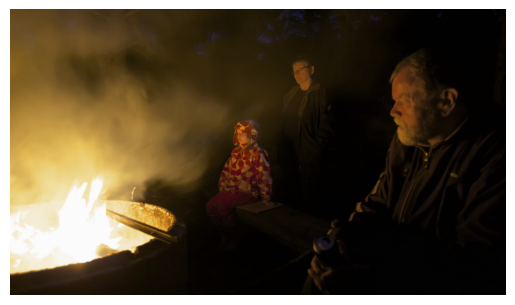

User 1: I remember that night so well
User 0: You can see the face of another man in the back. Do you recall his name?
User 1: Like it was yesterday
User 1: Tim... I think?
User 0: HAhahhaha. It was great fun. We should do it again sometime. TIM....thats it. Your right.


In [102]:
print_dialog_with_img_from_url(data[0])